In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
X_train = np.array([[i,j,k,l] for i in range(1,30) for j in range(1,30) for k in range(1,30) for l in range(1,30)])
y_train = np.dot(X_train , np.array([[1],[2],[3],[4]]))
X_train = np.insert(X_train,0,1,axis=1)

X_test = np.array([[i,i+1,i+2,i+3] for i in range(101,126)])
y_test = np.dot(X_test , np.array([[1],[2],[3],[4]]))
X_test = np.insert(X_test,0,1,axis=1)

In [87]:
X_train[:5]

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 3],
       [1, 1, 1, 1, 4],
       [1, 1, 1, 1, 5]])

In [88]:
y_train[:5]

array([[10],
       [14],
       [18],
       [22],
       [26]])

In [89]:
print("Shape of the Data : \n======================\n")
print("\nTrain Data :")
print("Shape of X_train : %s"%str(X_train.shape))
print("Shape of y_train : %s"%str(y_train.shape))

print("\nTest Data :")
print("Shape of X_test : %s"%str(X_test.shape))
print("Shape of y_test : %s"%str(y_test.shape))

Shape of the Data : 


Train Data :
Shape of X_train : (707281, 5)
Shape of y_train : (707281, 1)

Test Data :
Shape of X_test : (25, 5)
Shape of y_test : (25, 1)


In [90]:
def initialise_parameter(X):
    parameter = np.zeros((X.shape[1],1))
    return parameter

In [91]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [92]:
def costfunction(X,y,theta):
    m = X.shape[0]
    return (1 / (2 * m)) * np.dot((hypothesis(X,theta)-y).T , (hypothesis(X,theta)-y))[0,0]

In [93]:
def update_parameter(X,y,theta,alpha):
    m = X.shape[0]
    theta = theta - alpha * (1 / m) * np.dot( (hypothesis(X,theta)-y).T , X).T
    return theta

In [107]:
def modelLL(X,y,X_test,y_test,alpha=0.0001,iteration=1000,print_details=False):
    theta = initialise_parameter(X)
    cost = []
    if print_details:
        print("Loss for training in %d iteration  is : %s"%(0,str(costfunction(X_test,y_test,theta))))
    for _ in range(iteration):
        theta = update_parameter(X,y,theta,alpha)
        cost.append(costfunction(X,y,theta))
        if print_details and _%100==0:
            print("Loss for training in %d iteration  is : %s"%(_,str(costfunction(X_test,y_test,theta))))
    return theta,cost

In [109]:
theta,cost = modelLL(X_train,y_train,X_test,y_test,iteration=2000,print_details=True)

Loss for training in 0 iteration  is : 663850.0
Loss for training in 0 iteration  is : 541761.0850124999
Loss for training in 100 iteration  is : 5.9073768086039555
Loss for training in 200 iteration  is : 2.3283102187681384
Loss for training in 300 iteration  is : 1.190208654944103
Loss for training in 400 iteration  is : 0.7663225978012065
Loss for training in 500 iteration  is : 0.5904806250024202
Loss for training in 600 iteration  is : 0.5115353295951012
Loss for training in 700 iteration  is : 0.47420265538981327
Loss for training in 800 iteration  is : 0.4559102056165292
Loss for training in 900 iteration  is : 0.44666076289333606
Loss for training in 1000 iteration  is : 0.4417942739668174
Loss for training in 1100 iteration  is : 0.43907480639075375
Loss for training in 1200 iteration  is : 0.4374129367932554
Loss for training in 1300 iteration  is : 0.436273656758881
Loss for training in 1400 iteration  is : 0.43539317902966174
Loss for training in 1500 iteration  is : 0.4346

In [49]:
theta#before

array([[0.83265298],
       [1.25103554],
       [2.08368852],
       [2.91634149],
       [3.74899447]])

In [110]:
theta

array([[0.15229103],
       [0.997646  ],
       [1.9976452 ],
       [2.99764441],
       [3.99764362]])

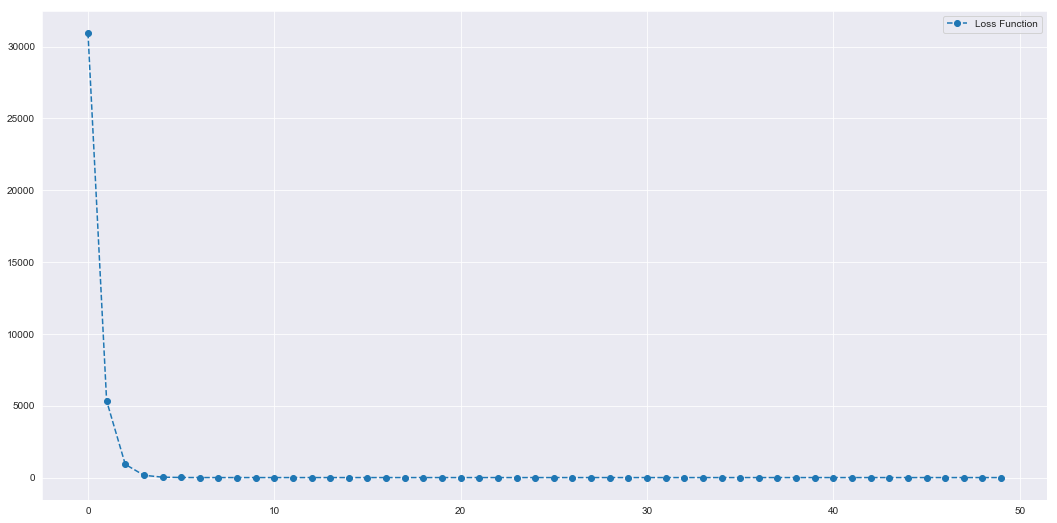

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,9))
plt.plot(cost[:50],'o--',label="Loss Function")
plt.legend()

In [53]:
hypothesis(X_test[:5],theta)

array([[1030.00206952],
       [1040.00212954],
       [1050.00218956],
       [1060.00224957],
       [1070.00230959]])

In [55]:
y_test[:5]

array([[1030],
       [1040],
       [1050],
       [1060],
       [1070]])

In [56]:
def create_output(X):
    return np.dot(X,np.array([[1],[2],[3],[4]]))

In [111]:
a = np.array([[5,9,10,25],[1000,15,1002,1003]])
a_out = create_output(a)
a = np.insert(a,0,1,axis=1)
print(a_out)

[[ 153]
 [8048]]


In [112]:
hypothesis(a,theta)

array([[ 153.03686253],
       [8041.03922003]])

In [113]:
#model takes 7.6sec to train